# データ分析の手順

## CRISP-DM

定番の分析プロセス。名前は知らなくてもだいたいこんな感じ。
矢印はおおまかな方向であって、手順はいったりきたりする。

![image.png](./images/crisp_dm.png)
* [wikiped Cross-industry standard process for data mining](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining#:~:text=Cross%2Dindustry%20standard%20process%20for%20data%20mining%2C%20known%20as%20CRISP,most%20widely%2Dused%20analytics%20model.)より

## ビジネス理解
* 何を解きたいのか？、何を解きたいのかで手法や精度が変わってくる
    * １００ｍ競争を例に、
        * 出走者の**タイム**を予測したい
        * **１着**を予測したい
        * １着から5着までの**着順**を予測したい
        * ある選手が**１着になる確率**を予測したい
* ビジネスならば、すでに手作業で行っていることをシステム（AI）に置き換える
    * 手作業を行っている作業者は長年の多くの知識を持っているそれを利用しない手はない


## データ理解
* 必要なデータは集まっているのか？
* データにノイズは含まれていないか？
* データに不足はないか？穴は空いていないか？
* 本当にこのデータから作りたいシステムはつくれるのか？

## データ準備
* **データ収集**、データなしには始まらない
    * どう集めるのか？
    * 本当に集まるのか？
    * 役にたつものなのか？
* データ加工
    * 穴埋め
        * １ヶ月分のデータをとったが、ある日だけうまくとれていない
        * どうやって穴埋めする？
    * 収集した生データから分析できる形に加工
        * 文字列を数値に変換する
        * 画像を数値に変換する
        * 音楽を数値に変換する
    * （後述の）モデルに適用するための加工

## モデル作成
* アルゴリズムの選択
    * 回帰分析
    * 決定木
    * ディープラーニング
    * etc
* パラメーターチューニング

## 評価
作成したモデルは、課題解決のために十分な精度がでているだろうか？

## 展開・公開
実利用には様々な課題がでてくる

* マシンリソース
* 利用者の理解


# 演習
## 手順
1. データ展開(irisデータセット)
1. モデル作成（回帰） ←なんだかんだいっても、まず予測しないとつまらない
1. データ理解
1. データ準備（加工）

# irisデータセット
有名なデータセット
花のアヤメの花の大きさのデータ

![image.png](./images/iris_image.png)

# 1. データ確認
csvをエクセルで開いて、中身を確認しよう


## データ
* 学習用データ
    * iris_learn.csv
        * id
        * sepal.length
        * sepal.width
        * petal.width
* 予測用データ
    * iris_predict.csv
        * id
        * sepal.length
        * sepal.width

# 2. モデルを作成してみよう

モデルをつくるアルゴリズムは色々あります。
今回は、線形回帰分析を行います。

[ここの解説がわかりやすい](https://istat.co.jp/ta_commentary/multiple)

In [1]:
#　このセルは色々とおまじないです

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

def plot_scatter(x, y):
    plt.figure(figsize=(5, 5))
    plt.scatter(x, y)
    plt.show()

def plot_hist(x):
    plt.figure(figsize=(5, 5))
    plt.hist(x)
    plt.show()

FILE_ORIGINAL = 'answer/iris.csv'
FILE_LEARN = 'dataset/iris_learn.csv'
FILE_PREDICT = 'dataset/iris_predict.csv'
FILE_PREDICT_ANSWER = 'answer/iris_predict_answer.csv'

COL_ID = 'id'
# COL_ALL = [COL_ID, 'sepal.length', 'sepal.width', 'petal.length', 'petal.width']
COL_ALL = [COL_ID, 'sepal.length', 'sepal.width', 'petal.width']
COL_TARGET = COL_ALL[3]

COL_FEATURE = []
for col in COL_ALL:
    if col == COL_TARGET or col == COL_ID:
        pass
    else:
        COL_FEATURE.append(col)

# データ生成
df = pd.read_csv(FILE_ORIGINAL)
df[COL_ID] = df.index

N = 15
display(df.groupby('variety').head(10).index)
mask_predict = pd.Series(df.index).map(lambda x: x in df.groupby('variety').head(10).index)

# mask = ~mask_predict
# l = [15, 8, 8]
# for i, name in enumerate(df['variety'].unique()):
#     print(name, l[i])
#     mask = mask | (pd.Series(df.index.tolist()).map(lambda x: x in df[df['variety'] == name].sample(l[i]).index))
    
# mask = ~mask_predict
# df[mask][COL_ALL].to_csv(FILE_LEARN, index=False)
# df[mask_predict][COL_ALL].drop(COL_TARGET, axis=1).to_csv(FILE_PREDICT, index=False)
# df[mask_predict][[COL_TARGET]].to_csv(FILE_PREDICT_ANSWER, index=False)

# display(df[mask_predict].groupby('variety').count())

# 正解データ
y_real = pd.read_csv(FILE_PREDICT_ANSWER)[COL_TARGET]

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59, 100, 101, 102, 103, 104, 105,
            106, 107, 108, 109],
           dtype='int64')

In [2]:
# pandas の read_csvメソッドでファイルを読み込みます

# 学習データ
df_learn = pd.read_csv(FILE_LEARN)

# 予測データ
df_predict = pd.read_csv(FILE_PREDICT)

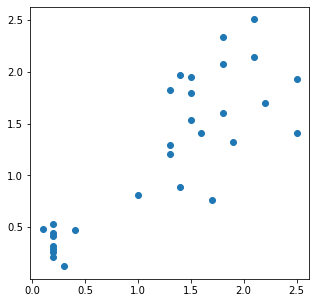

0.7132306582928614

In [3]:
# LinearRegressionが線形回帰のモジュールです

# LinearRegressionを初期化します
lr = LinearRegression()

# fit で学習データからモデルを作成します
X = df_learn[COL_FEATURE]
y = df_learn[COL_TARGET]
lr.fit(X, y)

# predictで予測データから予測を行います
y_pred = lr.predict(df_predict[COL_FEATURE])

# 散布図というグラフを描画します
# y_realは答えです。
plot_scatter(y_real, y_pred)

# r2_scoreは評価するための関数です
r2_score(y_real, y_pred)

# どのように精度をあげていくか？
## データを確認しよう

* エクセルでデータを見てみよう
* 散布図
* ヒストグラムを書こう

## 気づくことはありますか？

* ヒント１：点や棒のかたまりはいくつあるか？
* ヒント２：かたまりは何を意味しているのでしょうか？

## どうすれば精度はあがりそうですか？

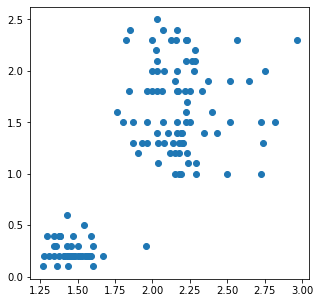

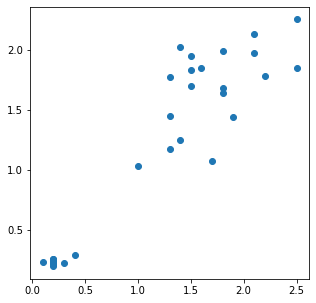

0.8615698661603043

In [6]:
# # 解答例

# df_learn = pd.read_csv(FILE_LEARN)
# df_predict = pd.read_csv(FILE_PREDICT)

# col1 = COL_FEATURE[0]
# col2 = COL_FEATURE[1]

# plot_scatter(df_learn[col1] / df_learn[col2], df_learn[COL_TARGET])

# P = 1.75
# COL_CLASS = 'class'
# df_learn[COL_CLASS] = df_learn[col1] / df_learn[col2] < P
# df_predict[COL_CLASS] = df_predict[col1] / df_predict[col2] < P


# df_mx = pd.DataFrame([], columns=['real', 'predict'])

# for name in df_learn[COL_CLASS].unique():
#     mask_learn = df_learn[COL_CLASS] == name
#     mask_predict = df_predict[COL_CLASS] == name
#     df_tmp_learn = df_learn[mask_learn]
#     df_tmp_predict = df_predict[mask_predict]    
#     # LinearRegressionを初期化します
#     lr = LinearRegression()

#     # fit で学習データからモデルを作成します
#     X = df_tmp_learn[COL_FEATURE]
#     y = df_tmp_learn[COL_TARGET]
#     lr.fit(X, y)

#     # predictで予測データから予測を行います
#     y_pred = lr.predict(df_tmp_predict[COL_FEATURE])

#     df_mx = pd.concat([
#         df_mx,
#         pd.DataFrame({
#             'real': y_real[mask_predict].tolist(), 
#             'predict': y_pred.tolist()
#         })
#     ], ignore_index=True)

# plot_scatter(df_mx['real'], df_mx['predict'])
# r2_score(df_mx['real'], df_mx['predict'])